In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [7]:
def _get_vl_with_plateau(
    critical_time_points: List[float],
    peak_plateau_height: float,
    tail_height: float,
    sample_time: float,
):
    r"""Sample one log10 VL at a given time under the VL-with-plateau model.
    
    Args:
        critical_time_points: A list of 4 floats reprensenting the time points 
            at which VL starts the peak plateau, starts decaying from the peak plateau, 
            enters the tail plateau, and drops to 0 from the tail. 
        peak_plateau_height: A float representing the height of the peak plateau.
        tail_height: A float representing the height of the tail.
        sample_time: A float representing the time at which to sample the VL.
    Returns:
        A float representing the log10 VL at the given time.
    """

    half_peak_time, start_peak_time, start_decay_time, start_tail_time, end_tail_time = critical_time_points


    if sample_time < half_peak_time:
        vl = tail_height / half_peak_time * sample_time
    elif sample_time < start_peak_time:
        vl = tail_height + (peak_plateau_height - tail_height) / (start_peak_time - half_peak_time) * (sample_time - half_peak_time)
    elif sample_time < start_decay_time:
        vl = peak_plateau_height
    elif sample_time < start_tail_time:
        vl = peak_plateau_height - (peak_plateau_height - tail_height) / (start_tail_time - start_decay_time) * (sample_time - start_decay_time)
    elif sample_time < end_tail_time:
        vl = tail_height
    else:
        vl = -1
    
    return float(vl)



## Figure 3(a)

Text(0, 0.5, 'log10 viral load (copies/mL)')

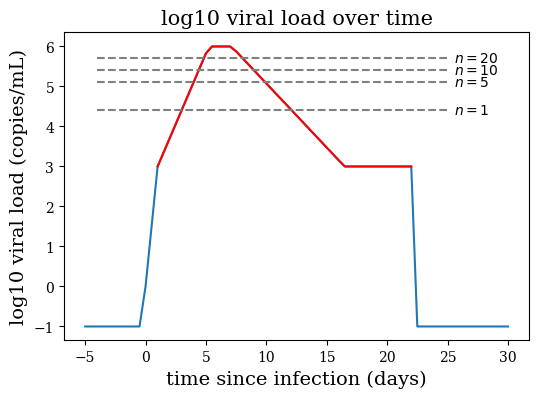

In [8]:
VL_PARAMS = {
        "half_peak": (1,1),
        "start_peak": (3,5), 
        "dt_peak": (1, 3), 
        "dt_decay": (7, 10), 
        "dt_tail": (5, 6), 
        "peak_height": (6, 6),
        "tail_height": (3, 3)
    }

np.random.seed(1234)

critical_time_points = [np.random.uniform(bounds[0], bounds[1])
        for bounds in list(VL_PARAMS.values())[:5]]
# if we are sampling time intervals rather than time points, convert to time points
for i in range(1,5):
    critical_time_points[i] += critical_time_points[i-1]
peak_plateau_height = np.random.uniform(
    VL_PARAMS["peak_height"][0], VL_PARAMS["peak_height"][1]
)
tail_plateau_height = np.random.uniform(
    VL_PARAMS["tail_height"][0], VL_PARAMS["tail_height"][1]
)


vls = []
sample_times = np.linspace(0, 30, 61)
pre_sample_times = np.linspace(-5, 0, 10, endpoint=False)
pre_sample_vls = np.ones(10)*-1

for sample_time in sample_times:
    vls.append(_get_vl_with_plateau(
        critical_time_points,
        peak_plateau_height,
        tail_plateau_height,
        sample_time
    ))

plt.rcParams["font.family"] = 'serif'

all_times = np.concatenate((pre_sample_times, sample_times))
all_vls = np.concatenate((pre_sample_vls, vls))

vl_masked = np.ma.masked_where(all_vls < 3, all_vls)
time_masked = np.ma.masked_where(all_vls < 3, all_times)

plt.figure(figsize=[6, 4])

plt.plot(all_times, all_vls)
plt.plot(time_masked, vl_masked, color="r")

individual_threshold = 4.4044
right_end = 25
left_end = -4
plt.hlines(individual_threshold, left_end, right_end, color="grey", linestyle="--", label="individual")
plt.hlines(individual_threshold + np.log10(5), left_end, right_end, color="grey", linestyle="--", label="pool size 5")
plt.hlines(individual_threshold + np.log10(10), left_end, right_end, color="grey", linestyle="--", label="pool size 10")
plt.hlines(individual_threshold + np.log10(20), left_end, right_end, color="grey", linestyle="--", label="pool size 20")

plt.annotate("$n=1$", (right_end + 0.5, individual_threshold - 0.1), fontsize=10)
plt.annotate("$n=5$", (right_end + 0.5, individual_threshold + np.log10(5) - 0.1), fontsize=10)
plt.annotate("$n=10$", (right_end + 0.5, individual_threshold + np.log10(10) - 0.1), fontsize=10)
plt.annotate("$n=20$", (right_end + 0.5, individual_threshold + np.log10(20) - 0.1), fontsize=10)


plt.title("log10 viral load over time", fontsize=15)
plt.xlabel("time since infection (days)", fontsize=14)
plt.ylabel("log10 viral load (copies/mL)", fontsize=14)
# plt.savefig(f'../figures/VL_dilution_thresholds.pdf', bbox_inches='tight')

## Figure EC.2

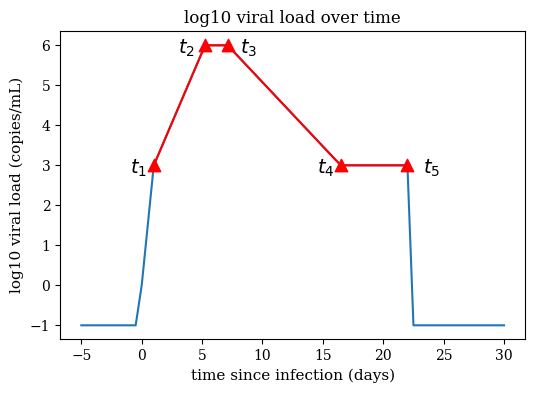

In [45]:
VL_PARAMS = {
        "half_peak": (1,1),
        "start_peak": (3,5), 
        "dt_peak": (1, 3), 
        "dt_decay": (7, 10), 
        "dt_tail": (5, 6), 
        "peak_height": (6, 6),
        "tail_height": (3, 3)
    }

np.random.seed(1234)

critical_time_points = [np.random.uniform(bounds[0], bounds[1])
        for bounds in list(VL_PARAMS.values())[:5]]
# if we are sampling time intervals rather than time points, convert to time points
for i in range(1,5):
    critical_time_points[i] += critical_time_points[i-1]
peak_plateau_height = np.random.uniform(
    VL_PARAMS["peak_height"][0], VL_PARAMS["peak_height"][1]
)
tail_plateau_height = np.random.uniform(
    VL_PARAMS["tail_height"][0], VL_PARAMS["tail_height"][1]
)


vls = []
sample_times = np.linspace(0, 30, 61)
pre_sample_times = np.linspace(-5, 0, 10, endpoint=False)
pre_sample_vls = np.ones(10)*-1

for sample_time in sample_times:
    vls.append(_get_vl_with_plateau(
        critical_time_points,
        peak_plateau_height,
        tail_plateau_height,
        sample_time
    ))

plt.rcParams["font.family"] = 'serif'

all_times = np.concatenate((pre_sample_times, sample_times))
all_vls = np.concatenate((pre_sample_vls, vls))

vl_masked = np.ma.masked_where(all_vls < 3, all_vls)
time_masked = np.ma.masked_where(all_vls < 3, all_times)

plt.figure(figsize=[6, 4])

plt.plot(all_times, all_vls)
plt.plot(time_masked, vl_masked, color="r")

plt.scatter(critical_time_points[0], 3, color="r", marker="^", s=80, zorder=10)
plt.scatter(critical_time_points[1], 6, color="r", marker="^", s=80, zorder=10)
plt.scatter(critical_time_points[2], 6, color="r", marker="^", s=80, zorder=10)
plt.scatter(critical_time_points[3], 3, color="r", marker="^", s=80, zorder=10)
plt.scatter(critical_time_points[4]-0.3, 3, color="r", marker="^", s=80, zorder=10)


plt.annotate(r"$t_1$", (critical_time_points[0]-2, 2.8), fontsize=14)
plt.annotate(r"$t_2$", (critical_time_points[1]-2.2, 5.8), fontsize=14)
plt.annotate(r"$t_3$", (critical_time_points[2]+1, 5.8), fontsize=14)
plt.annotate(r"$t_4$", (critical_time_points[3]-2, 2.8), fontsize=14)
plt.annotate(r"$t_5$", (critical_time_points[4]+1, 2.8), fontsize=14)



plt.title("log10 viral load over time", fontsize=12)
plt.xlabel("time since infection (days)", fontsize=11)
plt.ylabel("log10 viral load (copies/mL)", fontsize=11)
plt.savefig(f'../figures/VL_mark_timepoints.pdf', bbox_inches='tight')